<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Prediction

# Part 1 of 4

# Executive Summary 
Insert text

## Problem Statement
Insert text

## Contents: 

Part 1: Data Cleaning

-[Example](#Example)

Part 2: EDA 

Part 3: Modelling and Model Evaluation

Part 4: Recommendation and Conclusion

## Data Sets

* [`spray.csv`](./data/spray.csv): Description
* [`test.csv`](./data/test.csv): 
* [`train.csv`](./data/train.csv): 
* [`weather.csv`](./data/weather.csv): 

# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#data importing
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
spray = pd.read_csv('../datasets/spray.csv')
weather = pd.read_csv('../datasets/weather.csv')

In [4]:
#configure jupyter lab to prevent truncation for easier reference for columns
pd.set_option('display.max_columns', None)

In [5]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [7]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [8]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


### Data Cleaning

#### Train Dataset

In [9]:
train.shape

(10506, 12)

In [10]:
# Consolidating the number of mosquitoes and the presence of west nile virus 
train = train.groupby(by=['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy']).agg('sum')

In [11]:
train = pd.DataFrame(train.to_records())

In [12]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0


In [13]:
train.columns = [col.lower() for col in train.columns]
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0


In [14]:
train.shape

(8475, 12)

In [15]:
# No duplicated values
train.duplicated().sum()

0

In [16]:
test.columns = [col.lower() for col in test.columns]
test.head()

,id,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


Based on the description of the train and test datasets, each row has a maximum number of 50 mosquitoes. Using groupby, we shall aggregate the number of mosquitoes and the number of weset nile virus reported. In the process, this reduces the number of rows from 10506 to 8475. 

**Comment**: Need to think if we want to do the same for the test dataset as well. Reducing the number of rows might not be ideal for analysis. Need to find out more about kaggle submission.

#### Spray Dataset

In [17]:
#checking
print(spray.shape)
spray.head()

(14835, 4)


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [18]:
#convert column names to lowercase for easier referencing
spray.columns = [col.lower() for col in spray.columns]
spray.head()

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [19]:
#check for duplicates
spray.duplicated().sum()

541

In [20]:
#drop duplicates
spray.drop_duplicates(inplace=True)

In [21]:
#check dtypes
spray.dtypes

date          object
time          object
latitude     float64
longitude    float64
dtype: object

In [22]:
#convert date to datetime object
spray['date'] = pd.to_datetime(spray['date'], format = "%Y-%m-%d")

In [23]:
#check for null values
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [24]:
#drop 'Time' column
spray.drop(columns='time', inplace=True)

After checking for duplicates and dropping these rows, we checked for missing values and 584 were found in the `'time'` column, which indicates the exact time the spraying was conducted. However, in our main train & test datasets, observations are only by date. Thus, we will be dropping this column. Conveniently, this removes all the null values in this dataset as well.

Then, we checked the datatypes of the dataset to see if it corresponds to their respective data. We found that `'date'` column has object datatype. Hence, we convert it to a default format of datetime.

In [25]:
print(f'Max latitude from train dataset: {train["latitude"].max()}')
print(f'Max longitudefrom train dataset: {train["longitude"].max()}')
print(f'Max latitude from test dataset: {test["latitude"].max()}')
print(f'Max longitude from test dataset: {test["longitude"].max()}')

Max latitude from train dataset: 42.01743
Max longitudefrom train dataset: -87.531635
Max latitude from test dataset: 42.01743
Max longitude from test dataset: -87.531635


In [26]:
print(f'Min latitude from train dataset: {train["latitude"].min()}')
print(f'Min longitudefrom train dataset: {train["longitude"].min()}')
print(f'Min latitude from test dataset: {test["latitude"].min()}')
print(f'Min longitude from test dataset: {test["longitude"].min()}')

Min latitude from train dataset: 41.644612
Min longitudefrom train dataset: -87.930995
Min latitude from test dataset: 41.644612
Min longitude from test dataset: -87.930995


In [27]:
print(f'Max latitude from spray dataset: {spray["latitude"].max()}')
print(f'Max longitude from spray dataset: {spray["longitude"].max()}')
print(f'Min latitude from spray dataset: {spray["latitude"].min()}')
print(f'Min longitude from spray dataset: {spray["longitude"].min()}')

Max latitude from spray dataset: 42.3959833333333
Max longitude from spray dataset: -87.5867266666667
Min latitude from spray dataset: 41.713925
Min longitude from spray dataset: -88.0964683333333


In [28]:
spray.shape

(14294, 3)

In [29]:
spray = spray[(spray['latitude'] <= 42.01743)]
spray = spray[(spray['latitude'] >= 41.644612)]
spray = spray[(spray['longitude'] <= -87.531635)]
spray = spray[(spray['longitude'] >= -87.930995)]

In [30]:
spray.shape

(14145, 3)

We also checked for the locations in which sprays were administered. Based on the comparison with both train and test datasets, we realised that locations sprayed can be beyond the area of the train and test datasets. We streamlined the dataset by removing them. Hence, the number of rows was further dropped from 14294 to 14145.

### Weather Dataset

In [31]:
#checking
print(weather.shape)
weather.head()

(2944, 22)


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [32]:
#convert column names to lowercase for easier referencing
weather.columns = [col.lower() for col in weather.columns]
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [33]:
#check for duplicates
weather.duplicated().sum()

0

In [34]:
#check dtypes
weather.dtypes

station          int64
date            object
tmax             int64
tmin             int64
tavg            object
depart          object
dewpoint         int64
wetbulb         object
heat            object
cool            object
sunrise         object
sunset          object
codesum         object
depth           object
water1          object
snowfall        object
preciptotal     object
stnpressure     object
sealevel        object
resultspeed    float64
resultdir        int64
avgspeed        object
dtype: object

In [35]:
#convert date to datetime object
weather['date'] = pd.to_datetime(weather['date'], format = "%Y-%m-%d")

In [36]:
#check for null values
weather.isnull().sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
codesum        0
depth          0
water1         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
dtype: int64

After checking for duplicates (none was found) and datatypes, it seems like the date is classified as 'object', similar to the spray dataset. It was then converted to default format of datetime. As for missing values, it seems that there is none. However for missing values, we see from the dataset, there are non-imputed rows in some columns, for example `'codesum'`. Even though a null check was done and showed no missing values, it only checks for null values. Furthermore, upon checking the data dictionary for this dataset, missing data is also showed as:
* 'M' = Missing Data, or data that are not normally reported for the station.
* '-' = Values not available for sunrise/sunset. 
* 'T' = Trace amount of data (unable to quantify).

Thus, we must check for these imputed values and also non-imputed values (represented by `''` or `' '` in code).

In [37]:
#checking for missing data and non-imputed values
weather.isin(['M', '-', 'T', '', ' ']).sum().sort_values(ascending=False)

water1         2944
codesum        1609
sunset         1472
depth          1472
depart         1472
snowfall       1472
sunrise        1472
tavg             11
heat             11
cool             11
sealevel          9
stnpressure       4
wetbulb           4
avgspeed          3
preciptotal       2
date              0
dewpoint          0
tmin              0
tmax              0
resultspeed       0
resultdir         0
station           0
dtype: int64

In [38]:
#checking on how many stations
weather[['station']].value_counts()

station
1          1472
2          1472
dtype: int64

In [39]:
#check on water1
weather.groupby('station')['water1'].value_counts()

station  water1
1        M         1472
2        M         1472
Name: water1, dtype: int64

In [40]:
#check on codesum
weather.groupby('station')['codesum'].value_counts()

station  codesum           
1                              805
         RA                    161
         RA BR                 128
         BR                     66
         TSRA RA BR             48
                              ... 
2        TSRA RA BR HZ VCTS      1
         TSRA RA FG+ BR          1
         TSRA RA FG+ FG BR       1
         TSRA RA HZ FU           1
         TSRA RA VCTS            1
Name: codesum, Length: 140, dtype: int64

In [41]:
#check on sunset
weather.groupby('station')['sunset'].value_counts()

station  sunset
1        1931        96
         1930        56
         1929        48
         1923        32
         1925        32
                   ... 
         1900         8
         1901         8
         1905         8
         1912         8
2        -         1472
Name: sunset, Length: 119, dtype: int64

In [42]:
#check on sunrise
weather.groupby('station')['sunrise'].value_counts()

station  sunrise
1        0416        104
         0417         64
         0419         40
         0418         32
         0420         32
                    ... 
         0619          8
         0620          8
         0622          8
         0623          8
2        -          1472
Name: sunrise, Length: 122, dtype: int64

In [43]:
#check on depth
weather.groupby('station')['depth'].value_counts()

station  depth
1        0        1472
2        M        1472
Name: depth, dtype: int64

In [44]:
#check on depart
weather.groupby('station')['depart'].value_counts()

station  depart
1         2          93
         -1          84
         -2          80
          5          77
          1          76
          7          76
          3          75
          0          74
         -3          72
          4          71
          6          67
          8          59
         -5          57
         -4          56
         -6          50
          9          47
         10          46
         -8          43
         -7          30
         11          28
         12          28
         -9          25
         13          23
         -10         22
         14          22
         15          15
         16          12
         -11         10
         -12          8
         17           7
         -14          6
         18           6
         -13          5
         19           4
         20           4
         -15          3
         -16          3
         22           3
         -17          2
         21           2
         23           1


From the data dictionary, the first tell-tale sign for the reason for such a high rate of missing values/data is the difference in data extraction from different stations. AWOS stations will often have less data (i.e., fewer weather elements) than ASOS station. Also, it is also stated that "not all stations report snow totals" in the documentation. Since this was the case, we groupby the columns with the high missing values to the `'station'` column. From there, we can see that station 2 has most of the missing values. These are the next steps in handling the columns with the large missing values:

1) Dropping these features:
* `'water1'`, `'depth'` and `'snowfall'` as the they either consist of all missing data or are imputed as 0 value which does not provide any meaningful information.
* `'sunset'`, `'sunrise'` and `'codesum'` as weather and time will not be a focus in our project.
* `'depart'` as departure of temperature from historical norm is unlikely to affect mosquitos population.
* `'heat'` and `'cool'` as these variables are more relevant for calculating energy needs for electrical, natural gas, power, and heating, and air conditioning industries, i.e. not as relevant to risk of mosquito breeding.
* `'wetbulb'` as `'dewpoint'` will be the effective proxy of the humidity conditions.

2) Impute `'avgspeed'` with observations from other stations and impute mean of `'tmax'` & `'tmin'` for `'tavg'` feature.

3) Impute `'stnpressure'` and `'sealevel'` from previous and next day values as not much will change.

4) Dropping rows of `'preciptotal'` since data accounts for less than 1% of dataset.

In [45]:
# 1: dropping water1, depth and snowfall
weather.drop(columns=['water1', 'depth', 'snowfall','sunrise', 'sunset', 'codesum', 'depart', 'heat','cool','wetbulb'], inplace=True)

In [46]:
#impute tavg and avgspeed
def impute_tavg_avgspeed(row):
    #impute tavg with mean of tmax & tmin
    if row['tavg'] == 'M':
        row['tavg'] = round((row['tmax'] + row['tmin']) / 2)
    
    #impute avgspeed with observations from other 
    if row['avgspeed'] == 'M':
        row['avgspeed'] = weather.loc[
            (weather['date'] == row['date']) & 
            (weather['station'] == 1), 
            'avgspeed'].values[0]
    return row

In [47]:
weather = weather.apply(impute_tavg_avgspeed, axis=1)

In [48]:
#impute stnpressure and sealevel 
def impute_values(df):
    #impute stnpressure by interpolating from previous & next day values
    for index, row in df.loc[df['stnpressure'].isin(['M'])].iterrows():
        inter = (float(df.iloc[(index - 2)]['stnpressure']) + \
                 float(df.iloc[(index + 2)]['stnpressure'])) / 2
        df.at[index, 'stnpressure'] = round(inter, 2)

    #impute sealevel by interpolating from previous & next day values
    for index, row in df.loc[df['sealevel'].isin(['M'])].iterrows():
        inter = (float(df.iloc[(index - 2)]['sealevel']) + \
                 float(df.iloc[(index + 2)]['sealevel'])) / 2
        df.at[index, 'sealevel'] = round(inter, 2)    

In [49]:
impute_values(weather)

In [50]:
#dropping rows with missing values in preciptotal
weather = weather.drop(weather[(weather.preciptotal == 'M') | (weather.preciptotal == 'T')].index)

#checking
print(weather.shape)
weather

(2942, 12)


,station,date,tmax,tmin,tavg,dewpoint,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,51,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,34,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,34,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,35,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,25,0.03,29.49,30.20,22.6,34,22.9


In [51]:
#only 2 rows dropped but T values still present
#checking for other possible T combination
weather.isin(['  T']).sum().sort_values(ascending=False)

preciptotal    318
station          0
date             0
tmax             0
tmin             0
tavg             0
dewpoint         0
stnpressure      0
sealevel         0
resultspeed      0
resultdir        0
avgspeed         0
dtype: int64

In [52]:
# Change trace values for PrecipTotal to 0.01
weather['preciptotal'] = weather['preciptotal'].map(lambda x: 0.01 if x == '  T' else x)

In [53]:
#checking
weather.isin(['M', '-', 'T', '', ' ', '  T']).sum().sort_values(ascending=False)

station        0
date           0
tmax           0
tmin           0
tavg           0
dewpoint       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
dtype: int64

Upon dropping the stated features and imputing the values accordingly, we ran into a puzzling situation when attempting to drop rows containing the missing values in `'preciptotal'` as even after dropping them, T values are still present. After checking for possible combination of strings with T, it was found that the values imputed were actually `'  T'` and it accounted for 318 of the data. Since precipitation is a valuable feature to hold, we decided to impute the trace amount with 0.01 as it would signify a quantity that is very low and close to zero but still shows some amount of data collected that may be meaningful in our project.

In [54]:
# final check to change all columns to the appropriate data type
weather['tavg'] = weather['tavg'].astype(int)
weather['preciptotal'] = weather['preciptotal'].astype(float)
weather['stnpressure'] = weather['stnpressure'].astype(float)
weather['sealevel'] = weather['sealevel'].astype(float)
weather['avgspeed'] = weather['avgspeed'].astype(float)

In [55]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 2943
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2942 non-null   int64         
 1   date         2942 non-null   datetime64[ns]
 2   tmax         2942 non-null   int64         
 3   tmin         2942 non-null   int64         
 4   tavg         2942 non-null   int32         
 5   dewpoint     2942 non-null   int64         
 6   preciptotal  2942 non-null   float64       
 7   stnpressure  2942 non-null   float64       
 8   sealevel     2942 non-null   float64       
 9   resultspeed  2942 non-null   float64       
 10  resultdir    2942 non-null   int64         
 11  avgspeed     2942 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(1), int64(5)
memory usage: 287.3 KB


**Mosquiotes tend to grow when the weather is humid, therefore we created an additional weather feature call 'relativehumidity'.**

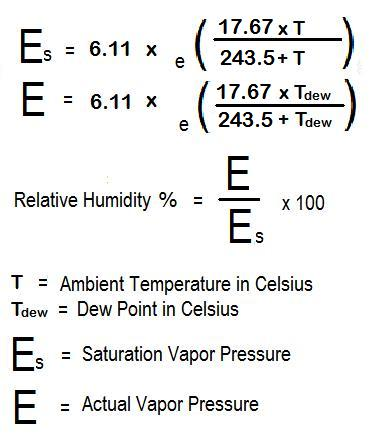

Source: https://www.calcunation.com/calculator/humidity-calculator.php

Note: (X°F − 32) × 5/9 = Y°C

In [56]:
weather['relativehumidity'] = 100 * (np.exp((17.67 * ((weather['dewpoint'] - 32) * (5/9))) / 
                                           (243.5 + ((weather['dewpoint'] - 32) * (5/9)))) 
                                    /
                                    np.exp((17.67 * ((weather['tavg'] - 32) * (5/9))) /
                                           (243.5 + ((weather['tavg'] - 32) * (5/9))))
                                    )

In [57]:
weather.head()

,station,date,tmax,tmin,tavg,dewpoint,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,relativehumidity
0,1,2007-05-01,83,50,67,51,0.0,29.10,29.82,1.7,27,9.2,56.410238
1,2,2007-05-01,84,52,68,51,0.0,29.18,29.82,2.7,25,9.6,54.497276
2,1,2007-05-02,59,42,51,42,0.0,29.38,30.09,13.0,4,13.4,71.176939
3,2,2007-05-02,60,43,52,42,0.0,29.44,30.08,13.3,2,13.4,68.594699
4,1,2007-05-03,66,46,56,40,0.0,29.39,30.12,11.7,7,11.9,54.848860


# EDA

#### Weather

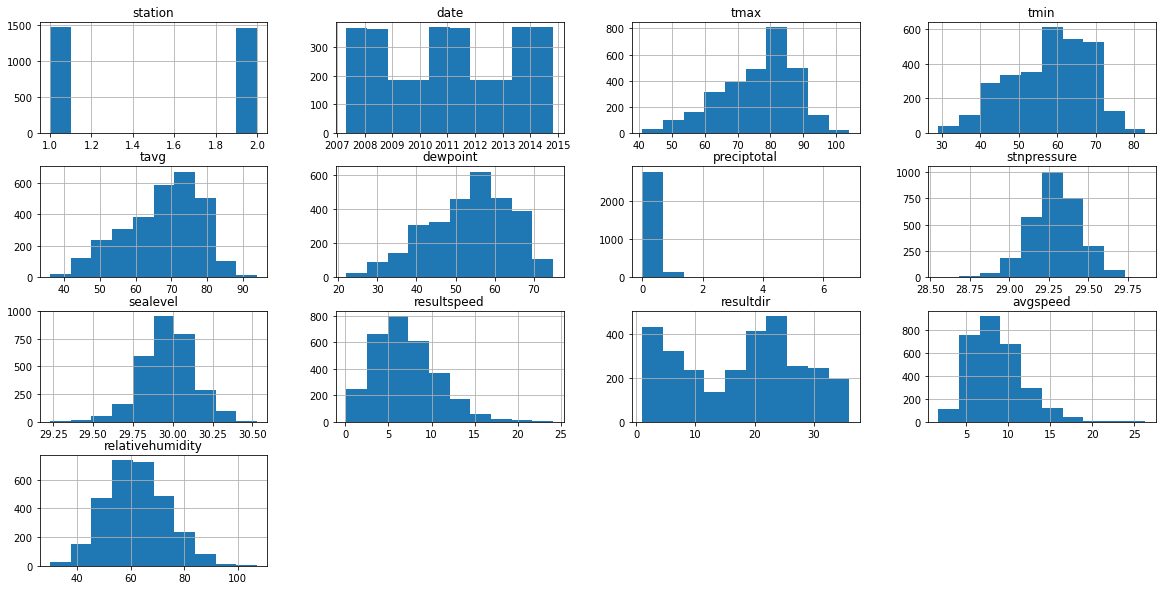

In [58]:
#plot distribution of numerical variables
weather.hist(figsize=(20,10));

<AxesSubplot:title={'center':'Relative Humidity'}, xlabel='station', ylabel='relativehumidity'>

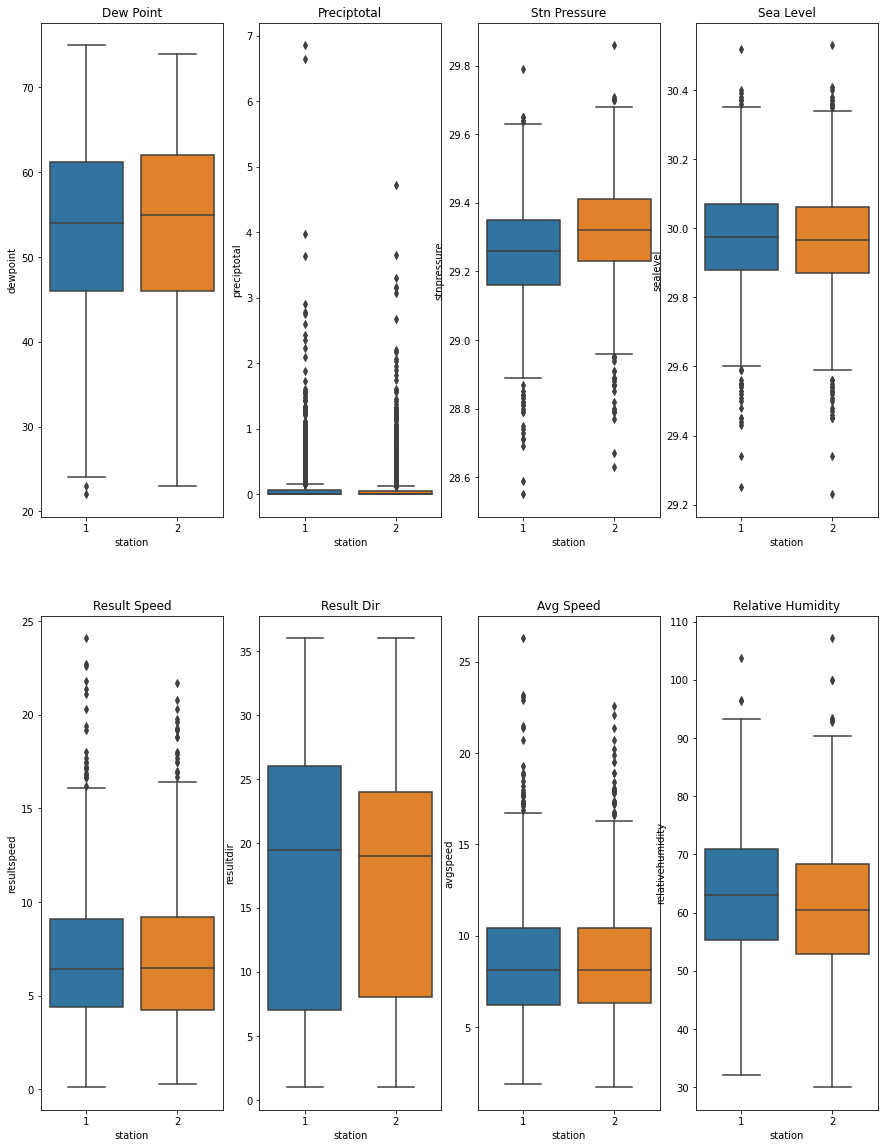

In [59]:
fig, axes= plt.subplots(2,4, figsize=(15,20))

axes[0,0].set_title('Dew Point')
sns.boxplot(x='station', y='dewpoint', data=weather, ax=axes[0,0])

axes[0,1].set_title('Preciptotal')
sns.boxplot(x='station', y='preciptotal', data=weather, ax=axes[0,1])

axes[0,2].set_title('Stn Pressure')
sns.boxplot(x='station', y='stnpressure', data=weather, ax=axes[0,2])

axes[0,3].set_title('Sea Level')
sns.boxplot(x='station', y='sealevel', data=weather, ax=axes[0,3])

axes[1,0].set_title('Result Speed')
sns.boxplot(x='station', y='resultspeed', data=weather, ax=axes[1,0])

axes[1,1].set_title('Result Dir')
sns.boxplot(x='station', y='resultdir', data=weather, ax=axes[1,1])

axes[1,2].set_title('Avg Speed')
sns.boxplot(x='station', y='avgspeed', data=weather, ax=axes[1,2])

axes[1,3].set_title('Relative Humidity')
sns.boxplot(x='station', y='relativehumidity', data=weather, ax=axes[1,3])

#### Spray

In [60]:
spray.head()

,date,latitude,longitude
95,2011-09-07,41.981433,-87.787777
96,2011-09-07,41.980998,-87.787778
97,2011-09-07,41.980560,-87.787762
98,2011-09-07,41.980198,-87.787758
99,2011-09-07,41.979752,-87.787765


In [61]:
spray.groupby(['date']).size()

date
2011-09-07    1573
2013-07-17    2202
2013-07-25    1607
2013-08-08    1195
2013-08-15    2668
2013-08-16     141
2013-08-22    1587
2013-08-29    2302
2013-09-05     870
dtype: int64

<AxesSubplot:title={'center':'Number of Sprays over the period of years 2011 - 2013'}, ylabel='date'>

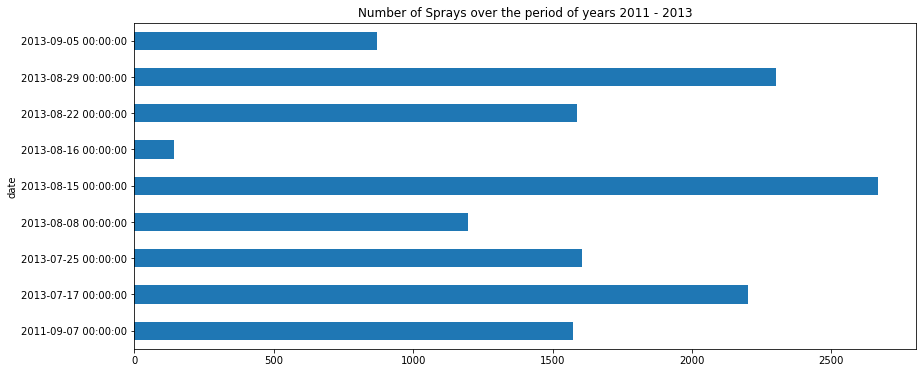

In [62]:
spray_numbers = spray.groupby(['date']).size()
spray_numbers.plot(kind='barh', figsize=(14,6), title="Number of Sprays over the period of years 2011 - 2013")

#### Train

In [63]:
#lower case columns name for easier usage. both train and test set columns changed.
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

# Time Series

#### Train

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    8475 non-null   object 
 1   address                 8475 non-null   object 
 2   species                 8475 non-null   object 
 3   block                   8475 non-null   int32  
 4   street                  8475 non-null   object 
 5   trap                    8475 non-null   object 
 6   addressnumberandstreet  8475 non-null   object 
 7   latitude                8475 non-null   float64
 8   longitude               8475 non-null   float64
 9   addressaccuracy         8475 non-null   int32  
 10  nummosquitos            8475 non-null   int64  
 11  wnvpresent              8475 non-null   int64  
dtypes: float64(2), int32(2), int64(2), object(6)
memory usage: 728.4+ KB


In [67]:
train['date'] = pd.to_datetime(train['date'])
# change date to datetimetype                               

In [68]:
test['date'] = pd.to_datetime(test['date'])
# change test to datetimetype

In [71]:
train_date = train.set_index('date')
#setting date column as index

In [72]:
print(train_date.shape) #look at shape first
train_date.head() #then ask for head

(8475, 11)


,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
date,,,,,,,,,,,
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0
2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0
2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0


In [73]:
train_date = train_date.sort_index()

In [74]:
print(train_date.shape) 
train_date.head() 

(8475, 11)


,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
date,,,,,,,,,,,
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0
2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0
2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0


In [97]:
train_date[['nummosquitos','wnvpresent']].resample('Y').sum()
#look at year total mosquitoes and wnv present

,nummosquitos,wnvpresent
date,,
2007-12-31,58688,236
2008-12-31,0,0
2009-12-31,21108,19
2010-12-31,0,0
2011-12-31,18799,57
2012-12-31,0,0
2013-12-31,36444,239


In [99]:
train_date[['nummosquitos','wnvpresent']].loc['2007'].resample('M').sum()
#look at year 2007 and at the monthly lvl of total mosquitoes and wnv present

,nummosquitos,wnvpresent
date,,
2007-05-31,40,0
2007-06-30,428,0
2007-07-31,7199,6
2007-08-31,40015,200
2007-09-30,9300,28
2007-10-31,1706,2


In [100]:
train_date[['nummosquitos','wnvpresent']].loc['2009'].resample('M').sum()
#look at year 2009 and at the monthly lvl of total mosquitoes and wnv present

,nummosquitos,wnvpresent
date,,
2009-05-31,190,0
2009-06-30,7390,0
2009-07-31,8833,5
2009-08-31,2346,9
2009-09-30,2137,5
2009-10-31,212,0


In [101]:
train_date[['nummosquitos','wnvpresent']].loc['2011'].resample('M').sum()
#look at year 2011 and at the monthly lvl of total mosquitoes and wnv present

,nummosquitos,wnvpresent
date,,
2011-06-30,4049,0
2011-07-31,8445,11
2011-08-31,2968,24
2011-09-30,3337,22


In [121]:
train_date[['nummosquitos','wnvpresent']].loc['2013'].resample('M').sum()
#look at year 2013 and at the monthly lvl of total mosquitoes and wnv present

,nummosquitos,wnvpresent
date,,
2013-06-30,4711,1
2013-07-31,12771,24
2013-08-31,12707,144
2013-09-30,6255,70


2007 and 2013 had a big outbeak in the month of August for WestNileVirus. We can see that the number starts to rise in June at a slow pace, gradually builds up the next month, but spikes in August.
There are signs that measures were working in year 2009 and 2011, but probably due to some cut-backs, the number started to climb again in 2013. 

In [104]:
train['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [115]:
species_wnv = train[(train['wnvpresent'] > 0)][['species','wnvpresent']]

In [116]:
species_wnv['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS'],
      dtype=object)

In [123]:
train_date[(train_date['wnvpresent'] > 0)]

,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
date,,,,,,,,,,,
2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,63,1
2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,2356,3
2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,644,2
2007-08-01,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,223,1
2007-08-01,"2200 West 89th Street, Chicago, IL 60643, USA",CULEX PIPIENS,22,W 89TH ST,T096,"2200 W 89TH ST, Chicago, IL",41.731922,-87.677512,8,17,1
...,...,...,...,...,...,...,...,...,...,...,...
2013-09-19,"University of Illinois at Chicago, 1100 South ...",CULEX PIPIENS,11,S ASHLAND AVE,T090,"1100 S ASHLAND AVE, Chicago, IL",41.868077,-87.666901,9,6,1
2013-09-26,"4600 Milwaukee Avenue, Chicago, IL 60630, USA",CULEX PIPIENS,46,N MILWAUKEE AVE,T003,"4600 N MILWAUKEE AVE, Chicago, IL",41.964242,-87.757639,8,3,1
2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1


In [126]:
train_date_wnv = train_date['wnvpresent']

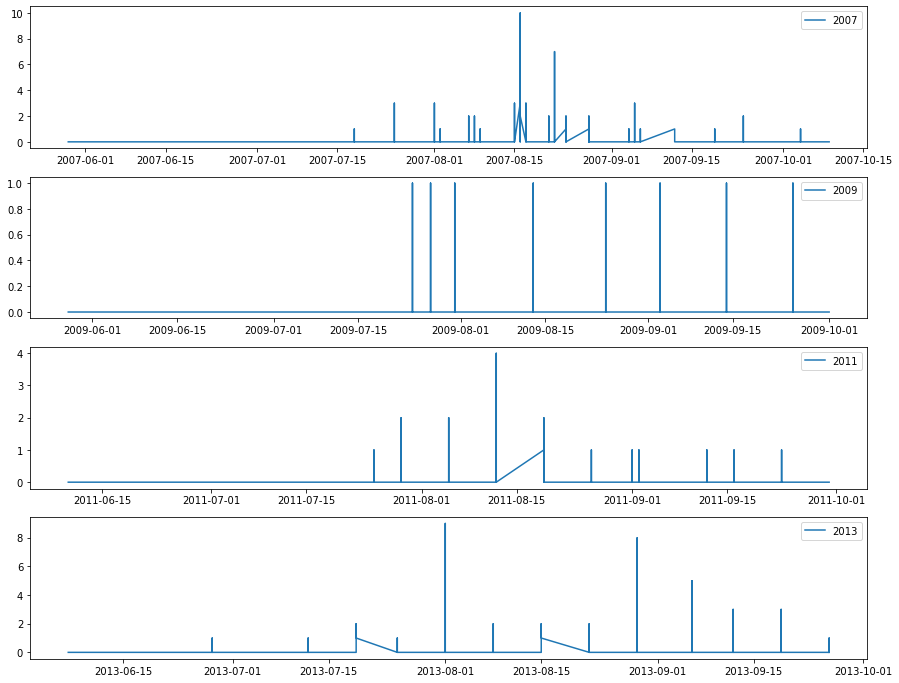

In [144]:
fig,axes = plt.subplots(nrows=4, figsize=(15,12))
axes[0].plot(train_date_wnv.loc['2007'], label = '2007')
axes[0].legend()

axes[1].plot(train_date_wnv.loc['2009'], label = '2009')
axes[1].legend()

axes[2].plot(train_date_wnv.loc['2011'], label = '2011')
axes[2].legend()

axes[3].plot(train_date_wnv.loc['2013'], label = '2013')
axes[3].legend()

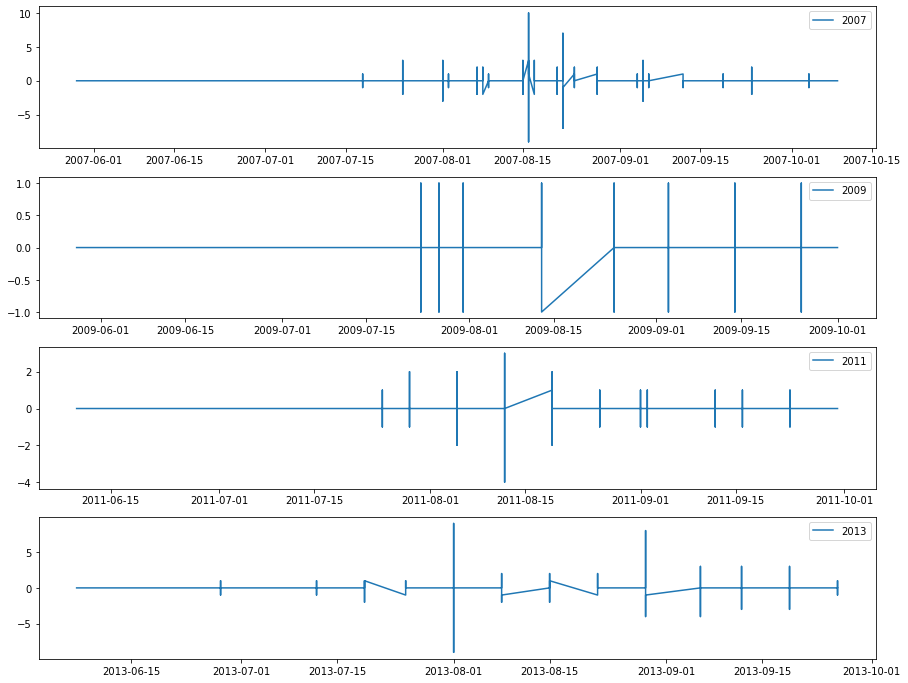

In [139]:
fig,axes = plt.subplots(nrows=4, figsize=(15,12))
axes[0].plot(train_date_wnv.loc['2007'].diff(), label = '2007')
axes[0].legend()

axes[1].plot(train_date_wnv.loc['2009'].diff(), label = '2009')
axes[1].legend()

axes[2].plot(train_date_wnv.loc['2011'].diff(), label = '2011')
axes[2].legend()

axes[3].plot(train_date_wnv.loc['2013'].diff(), label = '2013')
axes[3].legend()

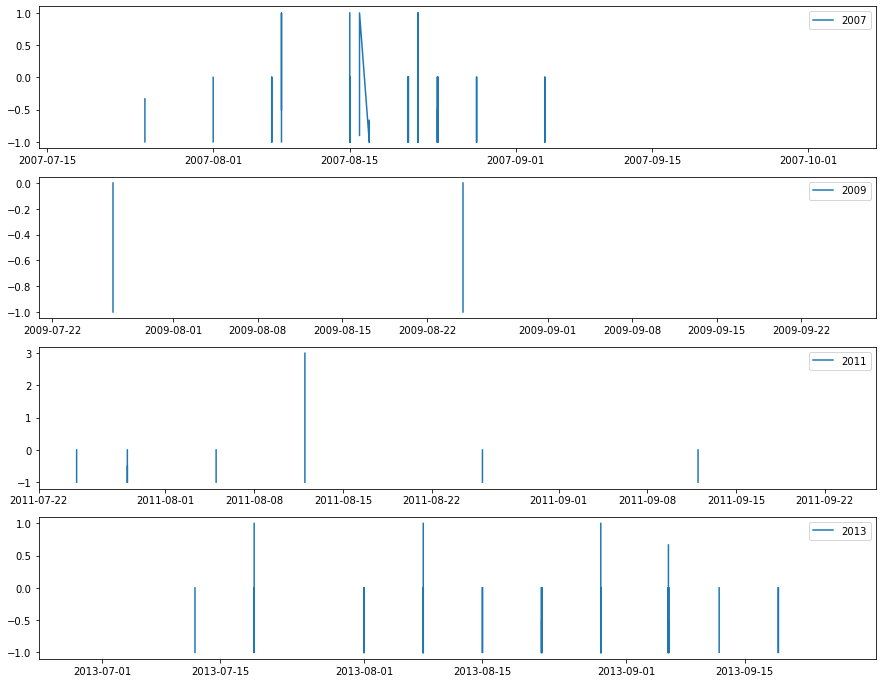

In [140]:
fig,axes = plt.subplots(nrows=4, figsize=(15,12))
axes[0].plot(train_date_wnv.loc['2007'].pct_change(), label = '2007')
axes[0].legend()

axes[1].plot(train_date_wnv.loc['2009'].pct_change(), label = '2009')
axes[1].legend()

axes[2].plot(train_date_wnv.loc['2011'].pct_change(), label = '2011')
axes[2].legend()

axes[3].plot(train_date_wnv.loc['2013'].pct_change(), label = '2013')
axes[3].legend()

In [141]:
train_date_mos = train_date['nummosquitos']

In [2]:
print("test")

test


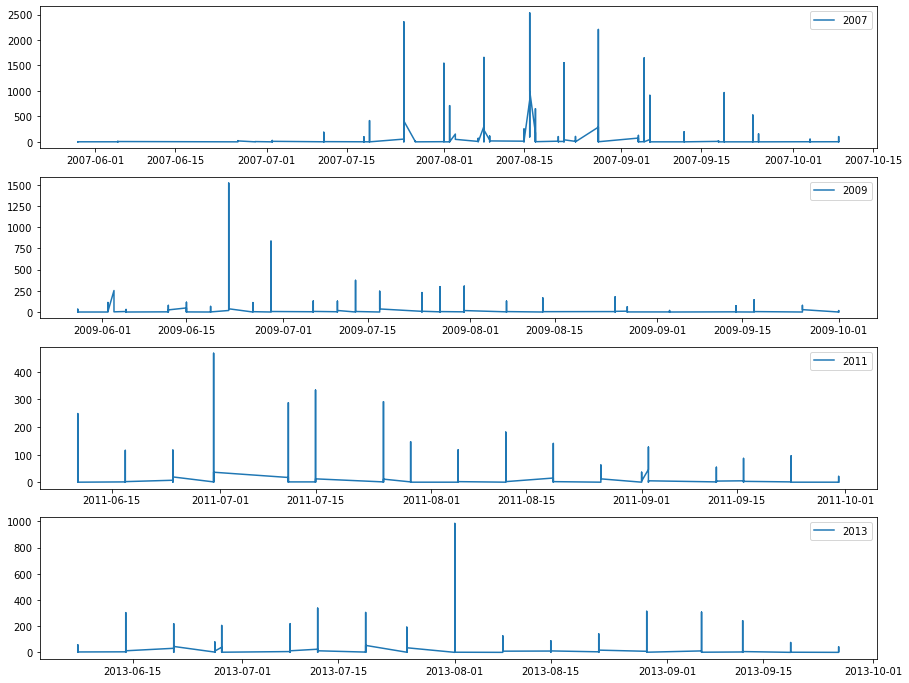

In [145]:
fig,axes = plt.subplots(nrows=4, figsize=(15,12))
axes[0].plot(train_date_mos.loc['2007'], label = '2007')
axes[0].legend()

axes[1].plot(train_date_mos.loc['2009'], label = '2009')
axes[1].legend()

axes[2].plot(train_date_mos.loc['2011'], label = '2011')
axes[2].legend()

axes[3].plot(train_date_mos.loc['2013'], label = '2013')
axes[3].legend()

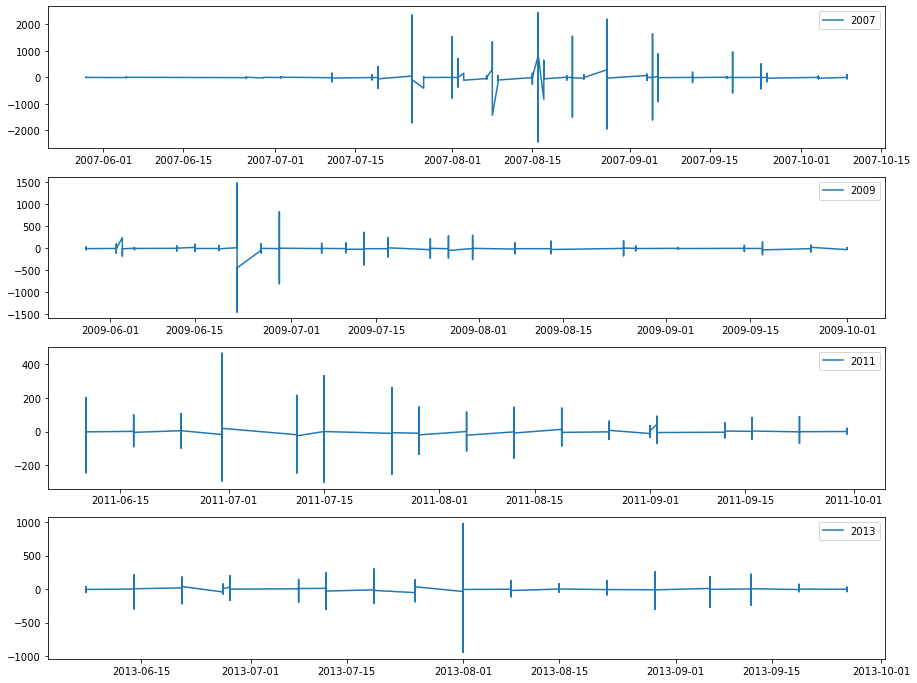

In [142]:
fig,axes = plt.subplots(nrows=4, figsize=(15,12))
axes[0].plot(train_date_mos.loc['2007'].diff(), label = '2007')
axes[0].legend()

axes[1].plot(train_date_mos.loc['2009'].diff(), label = '2009')
axes[1].legend()

axes[2].plot(train_date_mos.loc['2011'].diff(), label = '2011')
axes[2].legend()

axes[3].plot(train_date_mos.loc['2013'].diff(), label = '2013')
axes[3].legend()

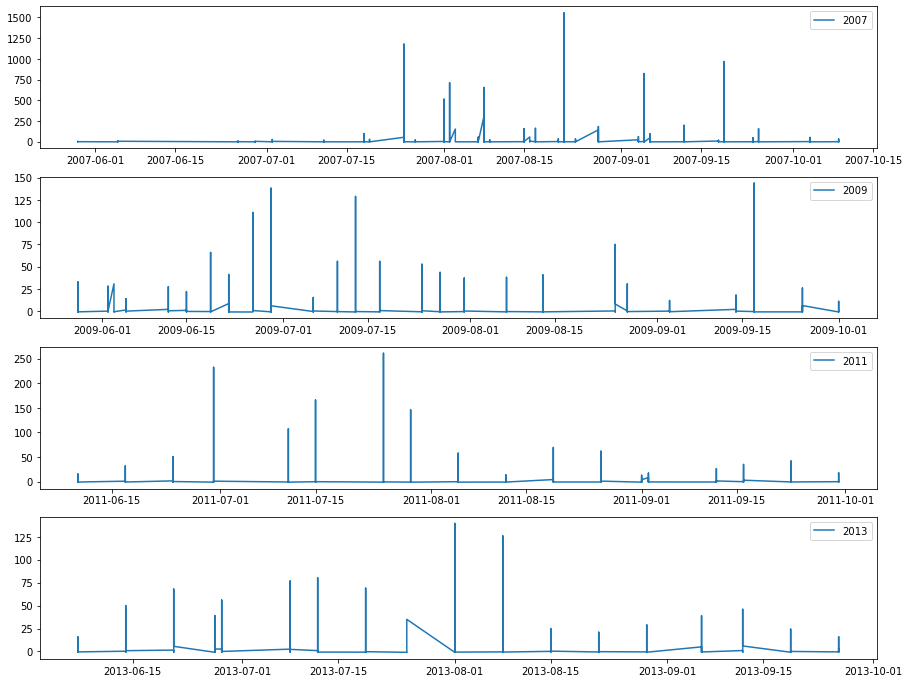

In [143]:
fig,axes = plt.subplots(nrows=4, figsize=(15,12))
axes[0].plot(train_date_mos.loc['2007'].pct_change(), label = '2007')
axes[0].legend()

axes[1].plot(train_date_mos.loc['2009'].pct_change(), label = '2009')
axes[1].legend()

axes[2].plot(train_date_mos.loc['2011'].pct_change(), label = '2011')
axes[2].legend()

axes[3].plot(train_date_mos.loc['2013'].pct_change(), label = '2013')
axes[3].legend()

# Modelling and Model Evaluation

# Recommendation and Conclusion